<a href="https://colab.research.google.com/github/juhumkwon/DataMining/blob/main/6_2_Anomaly(Local_Outlier_Factor_(LOF)_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

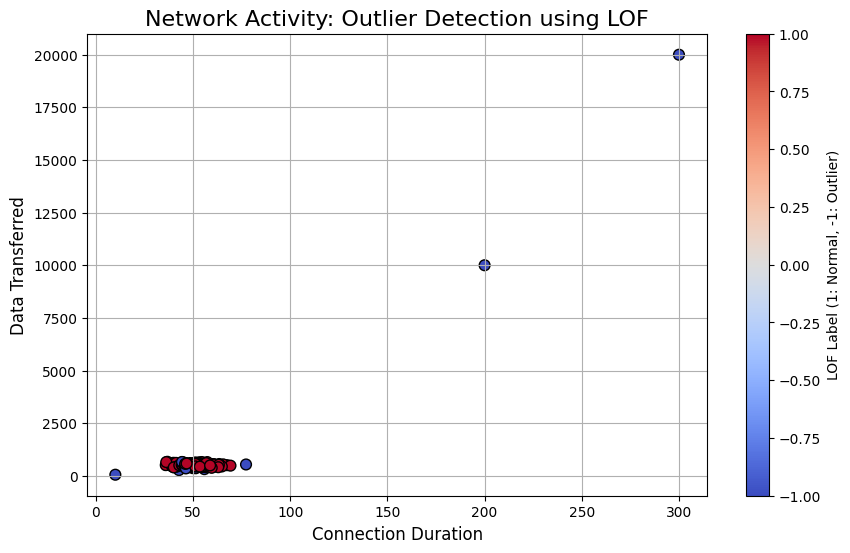

Detected Outliers:
     Connection Duration  Data Transferred   LOF Score
37             55.811728        314.756047   -2.722447
55             49.812519        364.322386   -1.644531
104            77.242926        536.419371   -1.622603
110            36.796441        663.671077   -1.711450
118            51.318431        356.800794   -1.782855
131            42.756486        270.807788   -3.882343
189            44.284468        654.842450   -1.565438
191            46.282351        349.817893   -1.935980
200           200.000000      10000.000000 -243.493983
201            10.000000         50.000000   -9.934244
202           300.000000      20000.000000 -455.431317


In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# 샘플 네트워크 활동 데이터 생성
# Features: [Connection Duration, Data Transferred]
np.random.seed(42)

# 정상적인 네트워크 활동 데이터 (클러스터 형태)
normal_data = np.random.multivariate_normal([50, 500], [[50, 0], [0, 5000]], size=200)

# 이상치 데이터 추가 (비정상적인 활동)
outliers = np.array([
    [200, 10000],  # 비정상적으로 큰 데이터 전송
    [10, 50],      # 비정상적으로 작은 연결 시간
    [300, 20000],  # 비정상적으로 큰 데이터와 연결 시간
])

# 데이터 합치기
data = np.vstack([normal_data, outliers])
labels = np.array([1] * len(normal_data) + [-1] * len(outliers))  # 정상: 1, 이상치: -1

# 데이터프레임 생성
df = pd.DataFrame(data, columns=["Connection Duration", "Data Transferred"])

# LOF 모델 생성 및 학습
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # 5% 이상치 가정
predicted_labels = lof.fit_predict(data)

# 이상치 점수 저장
df["LOF Score"] = lof.negative_outlier_factor_

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df["Connection Duration"], df["Data Transferred"],
            c=predicted_labels, cmap="coolwarm", edgecolor="k", s=60)
plt.title("Network Activity: Outlier Detection using LOF", fontsize=16)
plt.xlabel("Connection Duration", fontsize=12)
plt.ylabel("Data Transferred", fontsize=12)
plt.colorbar(label="LOF Label (1: Normal, -1: Outlier)")
plt.grid()
plt.show()

# 이상치 출력
outliers_detected = df[predicted_labels == -1]
print("Detected Outliers:")
print(outliers_detected)
